In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load the data into a DataFrame
# Load the data from CSV
df = pd.read_csv('BankChurners.csv')

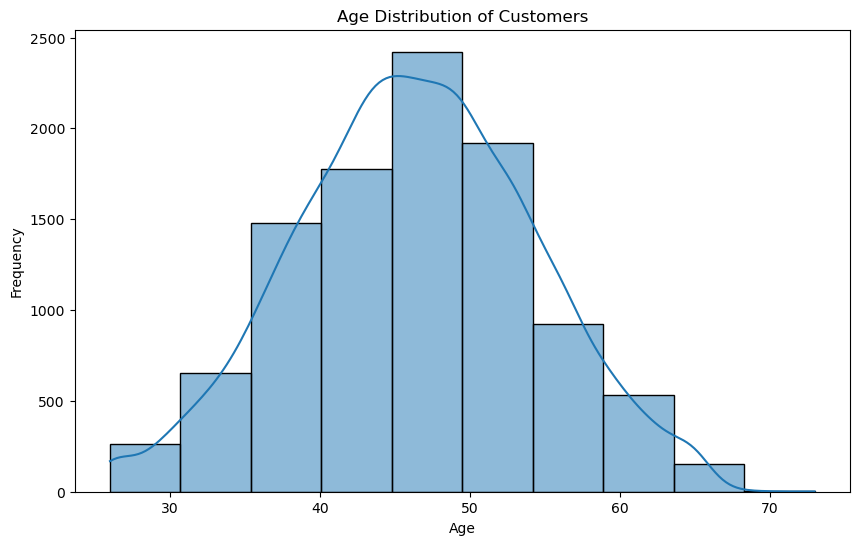

In [2]:
#Age Distribution of Customers
plt.figure(figsize=(10, 6))
sns.histplot(df['Customer_Age'], bins=10, kde=True)
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


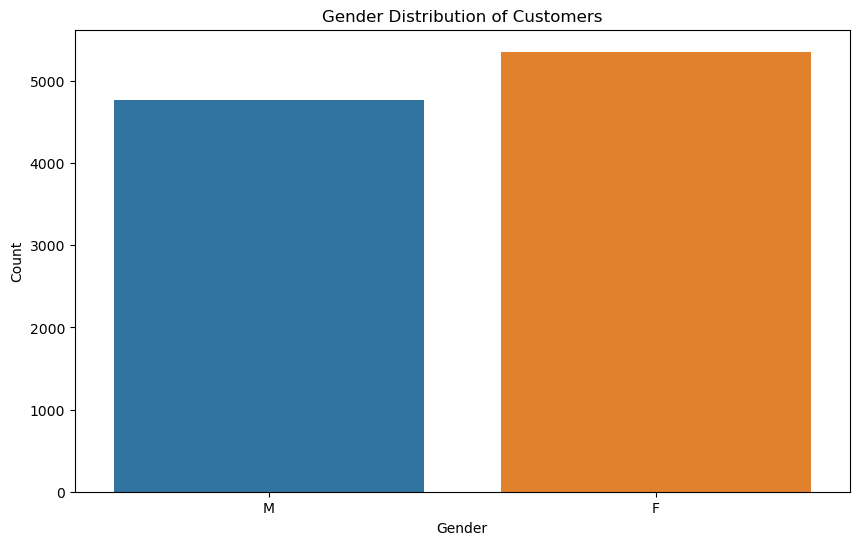

In [3]:
#Gender Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution of Customers')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

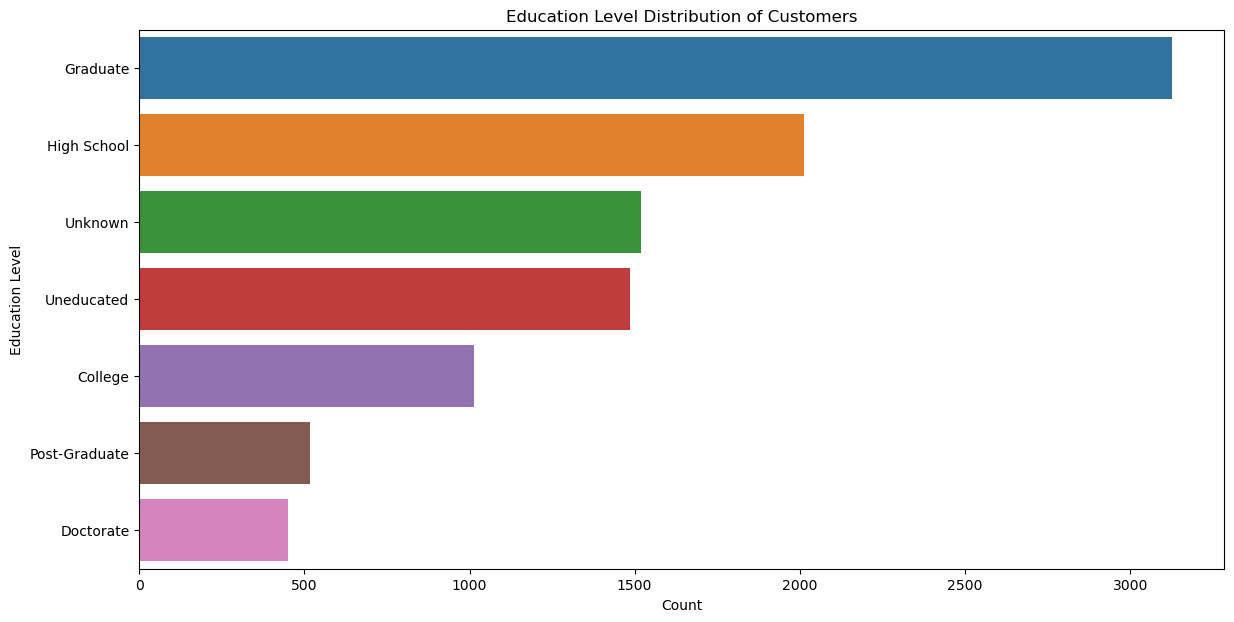

In [4]:
#Education Level Distribution
plt.figure(figsize=(14, 7))
sns.countplot(y='Education_Level', data=df, order=df['Education_Level'].value_counts().index)
plt.title('Education Level Distribution of Customers')
plt.xlabel('Count')
plt.ylabel('Education Level')
plt.show()

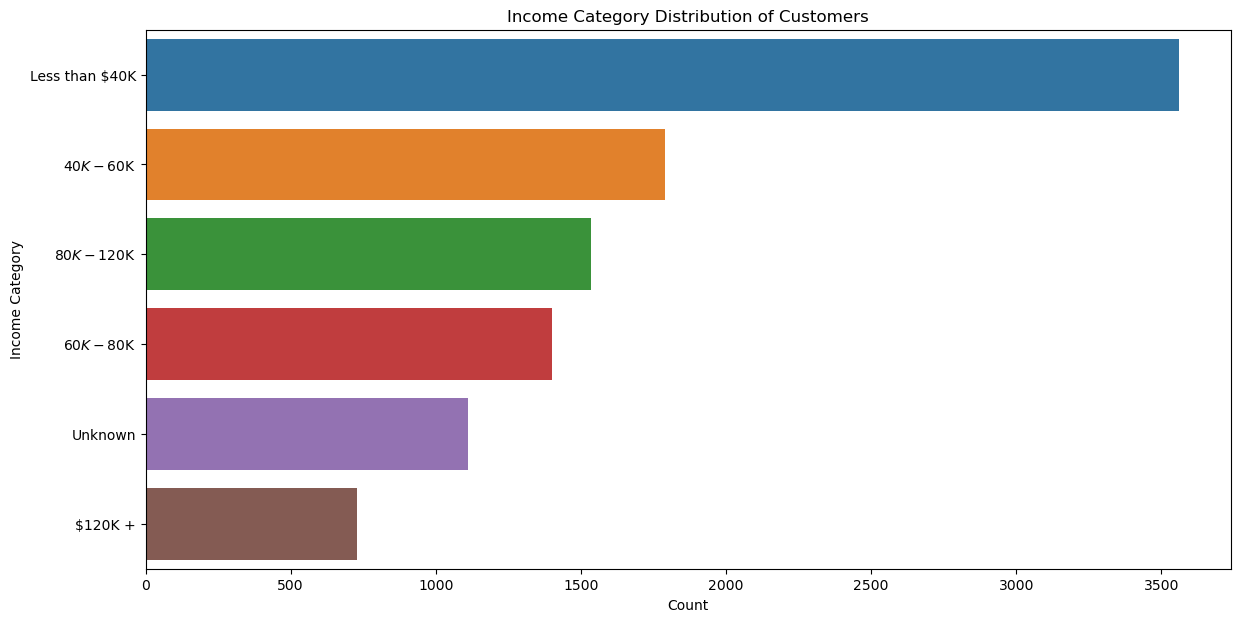

In [5]:
#Income Category Distribution
plt.figure(figsize=(14, 7))
sns.countplot(y='Income_Category', data=df, order=df['Income_Category'].value_counts().index)
plt.title('Income Category Distribution of Customers')
plt.xlabel('Count')
plt.ylabel('Income Category')
plt.show()


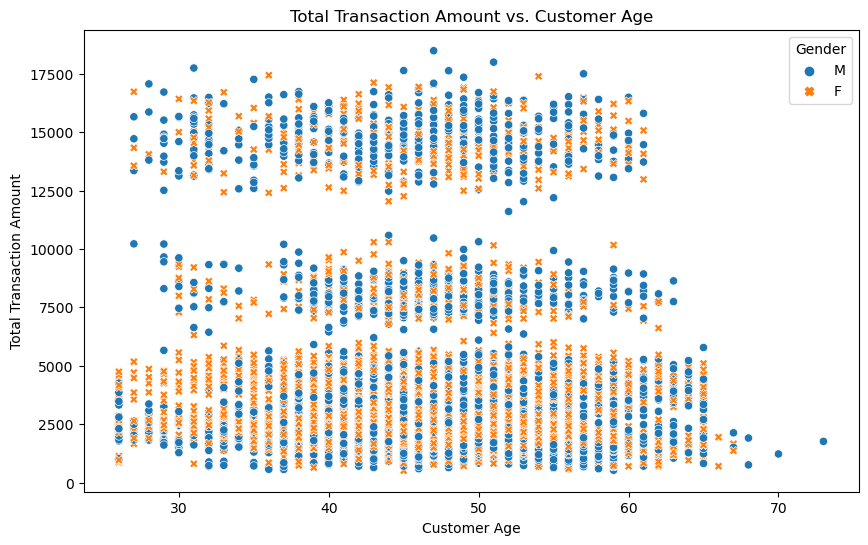

In [6]:
#Total Transaction Amount vs. Customer Age
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Customer_Age', y='Total_Trans_Amt', data=df, hue='Gender', style='Gender')
plt.title('Total Transaction Amount vs. Customer Age')
plt.xlabel('Customer Age')
plt.ylabel('Total Transaction Amount')
plt.show()


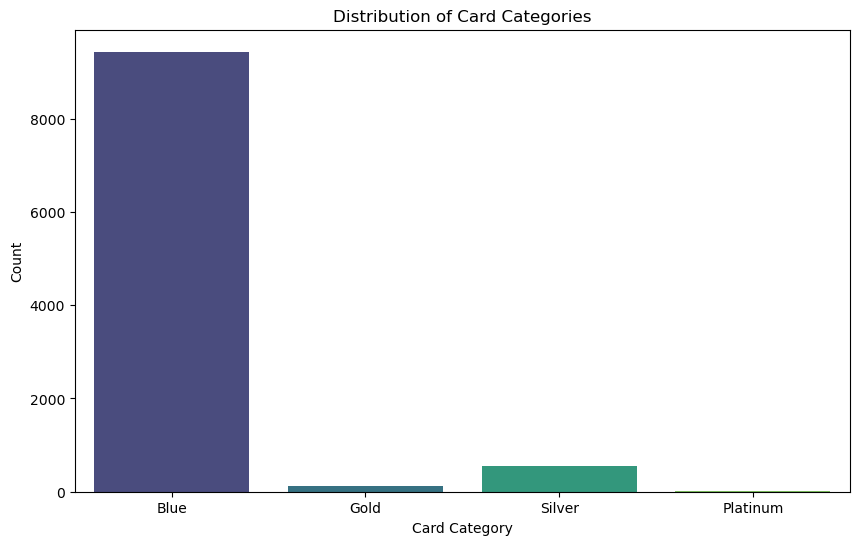

In [7]:
#Card Categories
plt.figure(figsize=(10, 6))
sns.countplot(x='Card_Category', data=df, palette='viridis')
plt.title('Distribution of Card Categories')
plt.xlabel('Card Category')
plt.ylabel('Count')
plt.show()


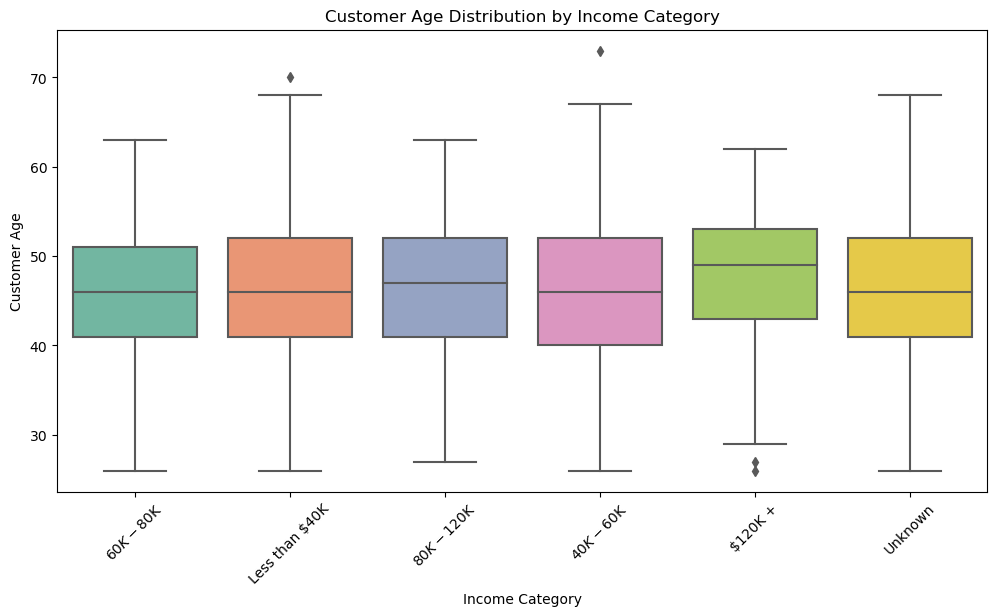

In [8]:
#Customer Age by Income Category
plt.figure(figsize=(12, 6))
sns.boxplot(x='Income_Category', y='Customer_Age', data=df, palette='Set2')
plt.title('Customer Age Distribution by Income Category')
plt.xlabel('Income Category')
plt.ylabel('Customer Age')
plt.xticks(rotation=45)
plt.show()


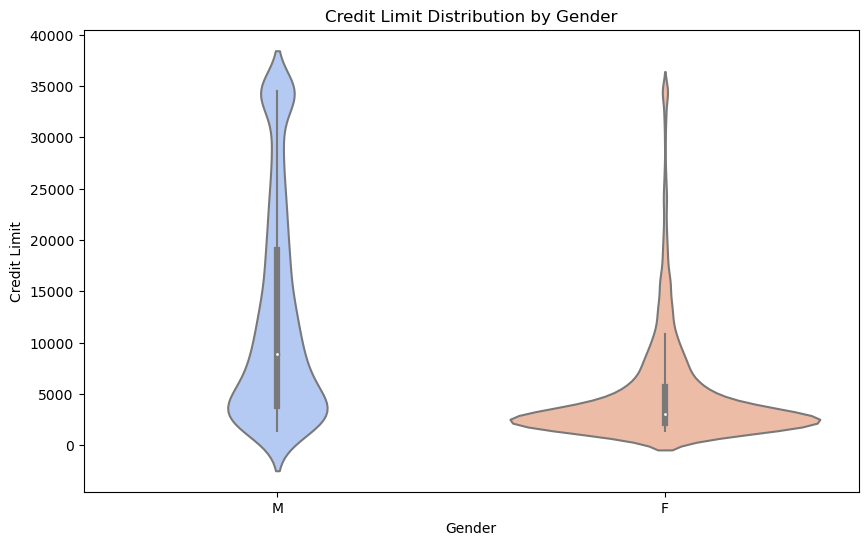

In [9]:
#Credit Limit by Gender
plt.figure(figsize=(10, 6))
sns.violinplot(x='Gender', y='Credit_Limit', data=df, palette='coolwarm')
plt.title('Credit Limit Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Credit Limit')
plt.show()


C:\Users\Vivek Karia\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


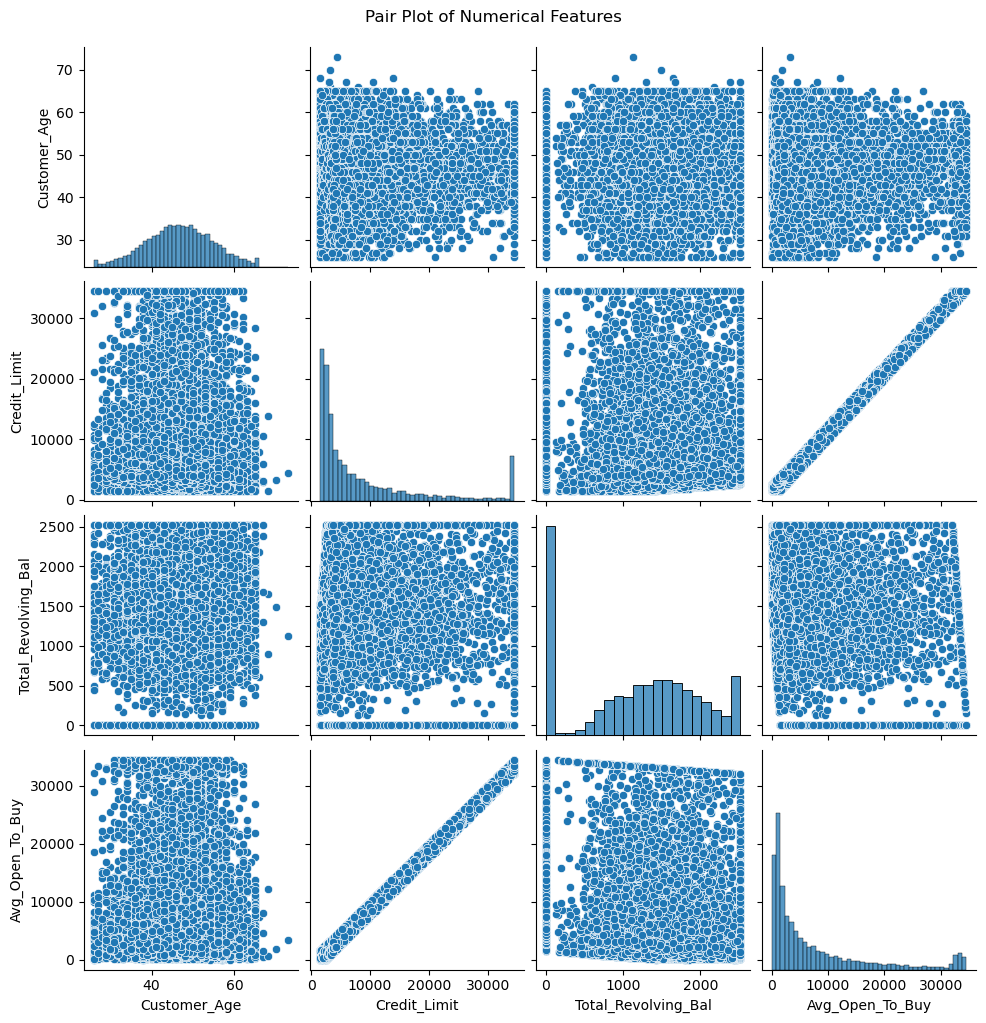

In [10]:
#Numerical Features
sns.pairplot(df[['Customer_Age', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy']])
plt.suptitle('Pair Plot of Numerical Features', y=1.02)
plt.show()


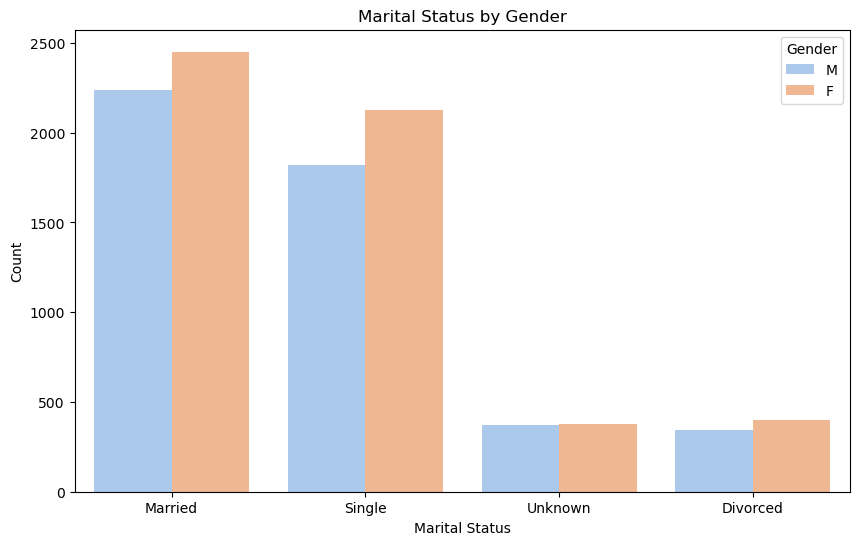

In [11]:
#Marital Status by Gender
plt.figure(figsize=(10, 6))
sns.countplot(x='Marital_Status', hue='Gender', data=df, palette='pastel')
plt.title('Marital Status by Gender')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()


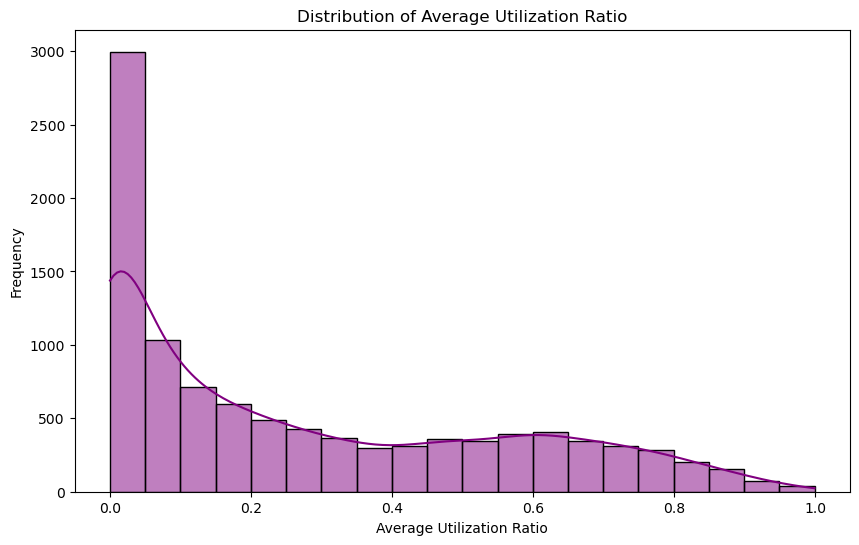

In [12]:
#Average Utilization Ratio
plt.figure(figsize=(10, 6))
sns.histplot(df['Avg_Utilization_Ratio'], bins=20, kde=True, color='purple')
plt.title('Distribution of Average Utilization Ratio')
plt.xlabel('Average Utilization Ratio')
plt.ylabel('Frequency')
plt.show()


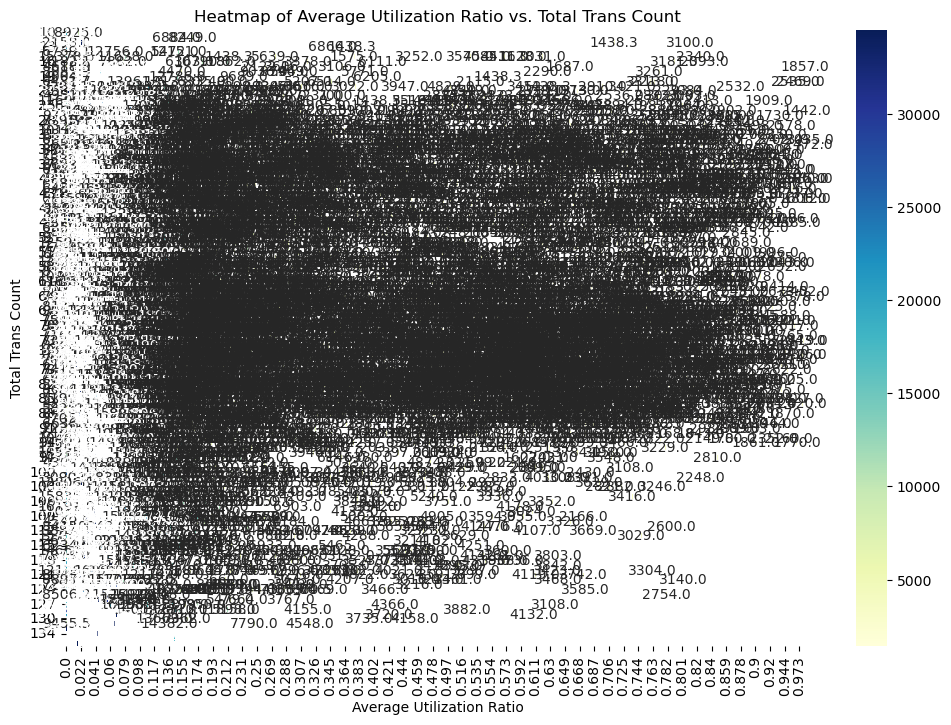

In [13]:
#Average Utilization Ratio vs. Total Transaction Count
pivot = df.pivot_table(index='Total_Trans_Ct', columns='Avg_Utilization_Ratio', values='Credit_Limit', aggfunc='mean')

plt.figure(figsize=(12, 8))
sns.heatmap(pivot, cmap='YlGnBu', annot=True, fmt=".1f")
plt.title('Heatmap of Average Utilization Ratio vs. Total Trans Count')
plt.xlabel('Average Utilization Ratio')
plt.ylabel('Total Trans Count')
plt.show()


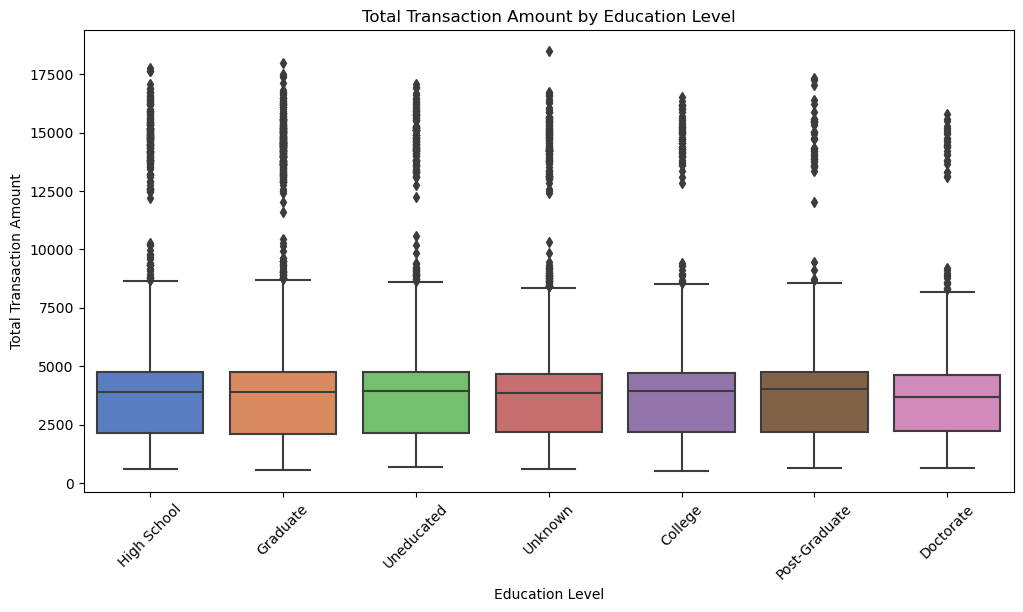

In [14]:
#Total Transaction Amount by Education Level
plt.figure(figsize=(12, 6))
sns.boxplot(x='Education_Level', y='Total_Trans_Amt', data=df, palette='muted')
plt.title('Total Transaction Amount by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Total Transaction Amount')
plt.xticks(rotation=45)
plt.show()


C:\Users\Vivek Karia\AppData\Local\Temp\ipykernel_7864\2727120676.py:3: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x='Marital_Status', y='Total_Trans_Amt', data=df, jitter=True, palette='Set1')


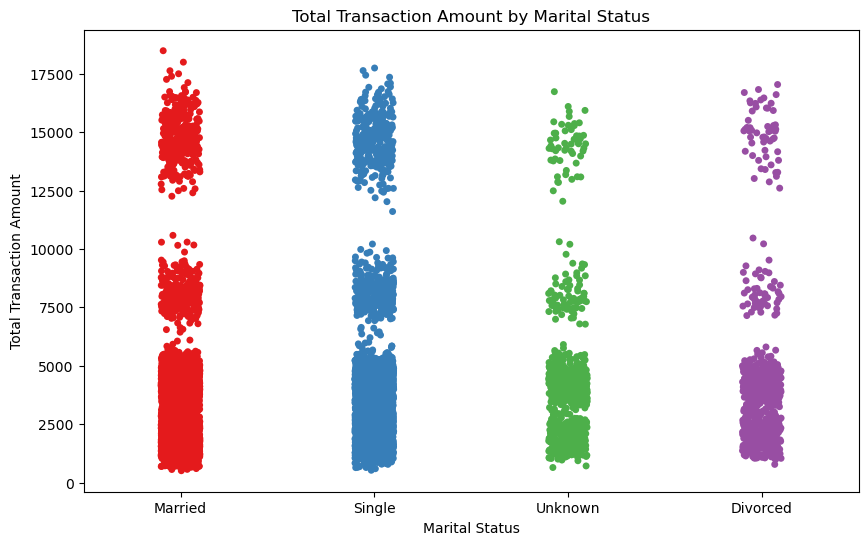

In [15]:
#Total Transaction Amount by Marital Status
plt.figure(figsize=(10, 6))
sns.stripplot(x='Marital_Status', y='Total_Trans_Amt', data=df, jitter=True, palette='Set1')
plt.title('Total Transaction Amount by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Total Transaction Amount')
plt.show()


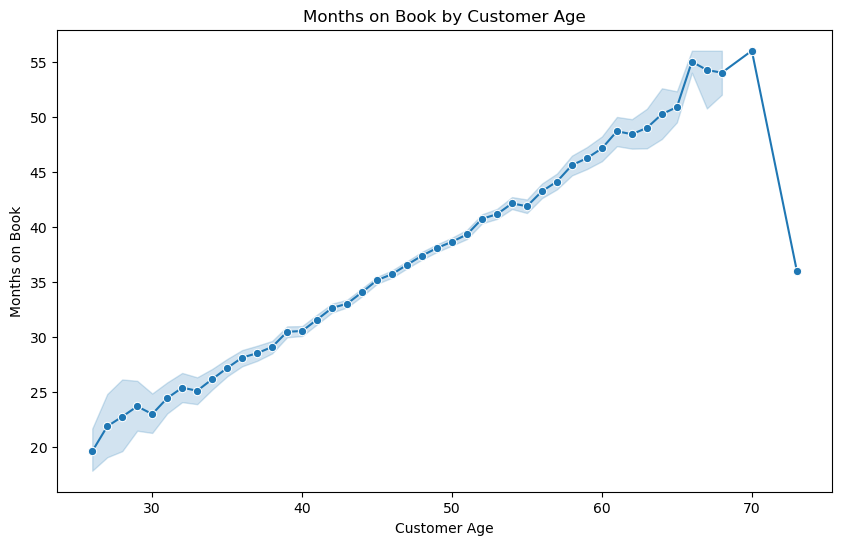

In [16]:
#Months on Book by Customer Age
plt.figure(figsize=(10, 6))
sns.lineplot(x='Customer_Age', y='Months_on_book', data=df, marker='o', linestyle='-')
plt.title('Months on Book by Customer Age')
plt.xlabel('Customer Age')
plt.ylabel('Months on Book')
plt.show()


In [17]:
# Check for missing values and drop rows with missing values
df = df.dropna()

In [18]:
# Encode categorical columns
categorical_cols = ['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [19]:
# Select relevant features
features = ['Customer_Age', 'Gender', 'Dependent_count', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']
target = 'Attrition_Flag'

X = df[features]
y = df[target]

In [20]:
# Normalize/standardize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [21]:
# Create a new DataFrame with scaled features
df_scaled = pd.DataFrame(X_scaled, columns=features)
df_scaled[target] = y.values  # Add the target column back


In [22]:
# Save the cleaned and scaled dataset to a new CSV file
df_scaled.to_csv('cleaned_dataset.csv', index=False)